In [1]:
# import more obscure packages
import subprocess

# check to see if they're installed
try:
    import elevation
    import richdem as rd
except ImportError:
    print('Installing packages ...')

    # install missing packages
    subprocess.check_call(["python", '-m', 'pip', 'install', 'elevation'])
    subprocess.check_call(["python", '-m', 'pip', 'install', 'richdem'])

In [2]:
# import pre-installed packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from osgeo import gdal

In [3]:
# download a DEM of Mt. Shasta from NASA
!eio clip -o Shasta-30m-DEM.tif --bounds -122.6 41.15 -121.9 41.6 

make: Entering directory '/root/.cache/elevation/SRTM1'
make: Nothing to be done for 'download'.
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
make: Nothing to be done for 'all'.
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
cp SRTM1.vrt SRTM1.c35babd5717442a5b510fd57639f60b3.vrt
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: Entering directory '/root/.cache/elevation/SRTM1'
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 -projwin -122.6 41.6 -121.9 41.15 SRTM1.c35babd5717442a5b510fd57639f60b3.vrt /content/Shasta-30m-DEM.tif
rm -f SRTM1.c35babd5717442a5b510fd57639f60b3.vrt
make: Leaving directory '/root/.cache/elevation/SRTM1'


In [31]:
# read in the DEM via gdal
filename = "Shasta-30m-DEM.tif"
gdal_data = gdal.Open(filename)

# get the main band
gdal_band = gdal_data.GetRasterBand(1)

# find the no-data value so we can mask it out later
nodataval = gdal_band.GetNoDataValue()

# convert the raster to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)

# replace the no-data with python-acceptable nan values
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

# calculate the slope
slope = rd.TerrainAttribute(shasta_dem, attrib='slope_percentage')

# calculate aspect
aspect = rd.TerrainAttribute(shasta_dem, attrib='aspect')

# calculate curvature
curvature = rd.TerrainAttribute(shasta_dem, attrib='curvature')

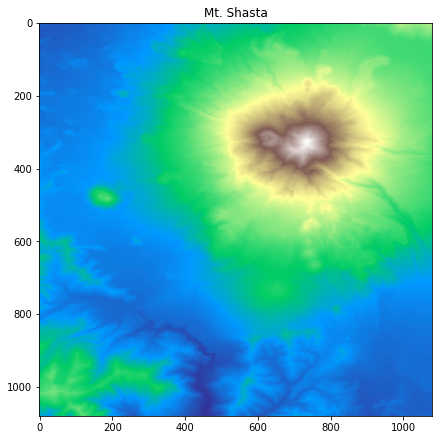

In [18]:
# set up the figure size
fig = plt.figure(figsize=(6,6), constrained_layout=True)

# plot the raw DEM
plt.imshow(data_array, cmap='terrain', interpolation='none')

# set the title
plt.title("Mt. Shasta")

# show
plt.show()

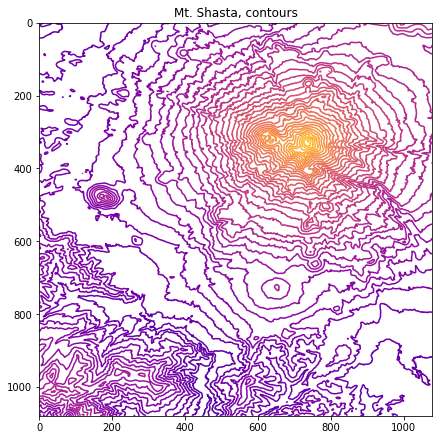

In [22]:
# set up the figure size
fig = plt.figure(figsize=(6,6), constrained_layout=True)

# plot the raster as Matplotlib's 'contour', 0-5000m at 100m intervals
plt.contour(data_array, cmap='plasma', levels=list(range(0, 5000, 100)))

# set the title
plt.title("Mt. Shasta, contours")

# set the aspect ratio to match
plt.gca().set_aspect('equal', adjustable='box')

# invert axis to match DEM
plt.gca().invert_yaxis()

# show
plt.show()

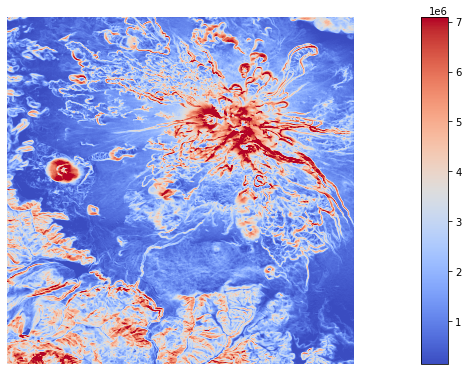

In [32]:
# plot the slope
rd.rdShow(slope, axes=False, cmap='coolwarm', figsize=(8, 5.5))

# show
plt.show()

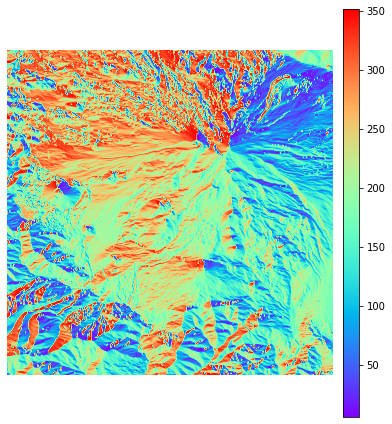

In [27]:
# plot aspect
rd.rdShow(aspect, axes=False, cmap='rainbow', figsize=(6, 6))

# show
plt.show()

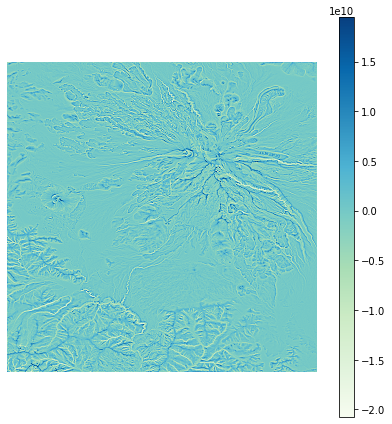

In [34]:
# plot curvature
rd.rdShow(curvature, axes=False, cmap='GnBu', figsize=(6, 6))

# show
plt.show()